<a href="https://colab.research.google.com/github/shoreey/Alzheimer-Prediction-with-Computer-vision-and-deep-learning-models/blob/main/Alzheimer_Disease_Prediction_with_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Libraries

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Loading and Printing the Dataset

In [ ]:
import os

# Define the path to the dataset
dataset_path = r"E:\Alzheimer_s Dataset"

# Function to load data from a folder
def load_data(folder):
    images = []
    labels = []
    subfolder_counts = {}
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        subfolder_counts[label] = len(os.listdir(label_path))
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            images.append(image_path)
            labels.append(label)
    return images, labels, subfolder_counts

# Load training data
train_images, train_labels, train_subfolder_counts = load_data(os.path.join(dataset_path, "train"))

# Load testing data
test_images, test_labels, test_subfolder_counts = load_data(os.path.join(dataset_path, "test"))

# Print the number of images in training and testing sets
print("Number of images in training set:", len(train_images))
print("Number of images in testing set:", len(test_images))

# Print the number of images in each subfolder
print("\nNumber of images in each subfolder in the training set:")
for subfolder, count in train_subfolder_counts.items():
    print(f"{subfolder}: {count}")

print("\nNumber of images in each subfolder in the testing set:")
for subfolder, count in test_subfolder_counts.items():
    print(f"{subfolder}: {count}")


Number of images in training set: 5121
Number of images in testing set: 1279

Number of images in each subfolder in the training set:
MildDemented: 717
ModerateDemented: 52
NonDemented: 2560
VeryMildDemented: 1792

Number of images in each subfolder in the testing set:
MildDemented: 179
ModerateDemented: 12
NonDemented: 640
VeryMildDemented: 448


# Visualization of the Distribution of the Classes

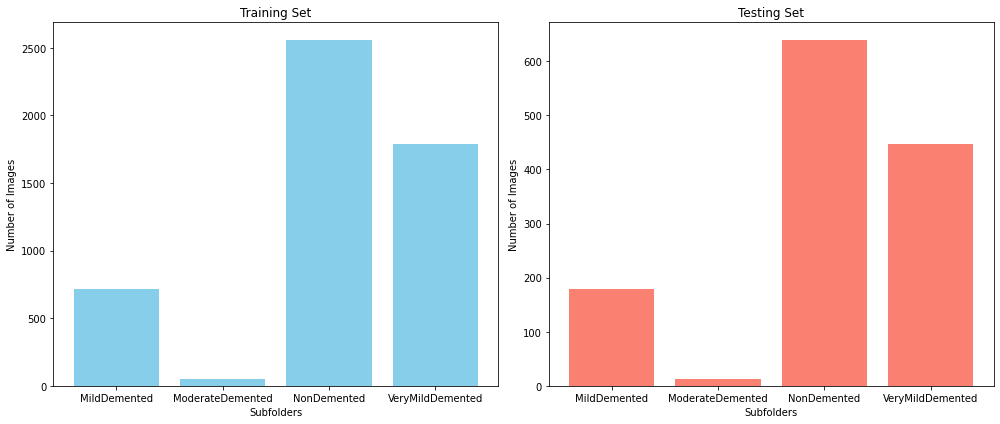

In [ ]:
import matplotlib.pyplot as plt

# Data
training_subfolders = list(train_subfolder_counts.keys())
training_counts = list(train_subfolder_counts.values())

testing_subfolders = list(test_subfolder_counts.keys())
testing_counts = list(test_subfolder_counts.values())

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(training_subfolders, training_counts, color='skyblue')
plt.title('Training Set')
plt.xlabel('Subfolders')
plt.ylabel('Number of Images')

plt.subplot(1, 2, 2)
plt.bar(testing_subfolders, testing_counts, color='salmon')
plt.title('Testing Set')
plt.xlabel('Subfolders')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()


# Visualization of Images


Visualizing one random image from 'MildDemented' subfolder:


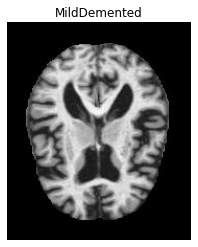


Visualizing one random image from 'ModerateDemented' subfolder:


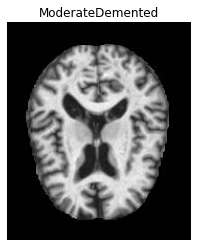


Visualizing one random image from 'NonDemented' subfolder:


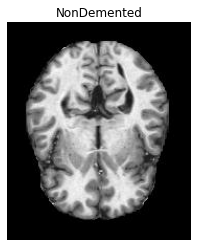


Visualizing one random image from 'VeryMildDemented' subfolder:


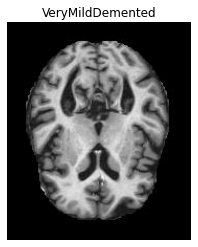


Visualizing one random image from 'MildDemented' subfolder:


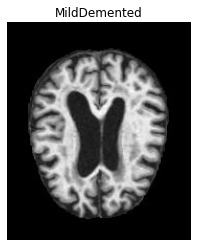


Visualizing one random image from 'ModerateDemented' subfolder:


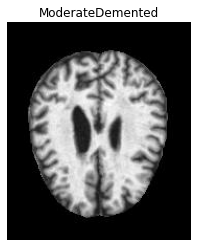


Visualizing one random image from 'NonDemented' subfolder:


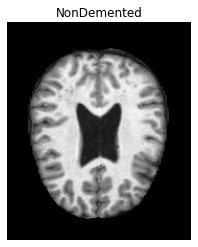


Visualizing one random image from 'VeryMildDemented' subfolder:


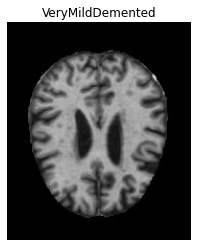

In [ ]:
import random
import cv2

# Function to visualize one random image from each subfolder
def visualize_random_images(images, labels, subfolder_counts):
    for subfolder, count in subfolder_counts.items():
        print(f"\nVisualizing one random image from '{subfolder}' subfolder:")
        subfolder_indices = [i for i, label in enumerate(labels) if label == subfolder]
        random_index = random.choice(subfolder_indices)
        image_path = images[random_index]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB (OpenCV reads images in BGR format)
        plt.imshow(image)
        plt.title(subfolder)
        plt.axis('off')
        plt.show()

# Visualize one random image from each subfolder in the training set
visualize_random_images(train_images, train_labels, train_subfolder_counts)

# Visualize one random image from each subfolder in the testing set
visualize_random_images(test_images, test_labels, test_subfolder_counts)


# Data Augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

# Define image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Create image data generators with data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting training set into training and validation
)

# Test data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # This is for training data
)

# Load and preprocess validation data
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # This is for validation data
)

# Load and preprocess test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
)

# Check class indices
print("Class Indices:", train_generator.class_indices)

# Print number of samples
print("Number of samples in training set:", train_generator.samples)
print("Number of samples in validation set:", validation_generator.samples)
print("Number of samples in test set:", test_generator.samples)



Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Class Indices: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
Number of samples in training set: 4098
Number of samples in validation set: 1023
Number of samples in test set: 1279


# Model Construction

# Resnet-50

Epoch 1/5
129/129 [==============================] - 461s 4s/step - loss: 4.9515 - accuracy: 0.4258 - val_loss: 1.0430 - val_accuracy: 0.5005
Epoch 2/5
129/129 [==============================] - 423s 3s/step - loss: 1.0827 - accuracy: 0.4912 - val_loss: 1.0539 - val_accuracy: 0.5005
Epoch 3/5
129/129 [==============================] - 419s 3s/step - loss: 1.0677 - accuracy: 0.4963 - val_loss: 1.0531 - val_accuracy: 0.5005
Epoch 4/5
129/129 [==============================] - 395s 3s/step - loss: 1.0625 - accuracy: 0.4939 - val_loss: 1.0421 - val_accuracy: 0.5005
Epoch 5/5
40/40 [==============================] - 83s 2s/step - loss: 1.0375 - accuracy: 0.5004
Test Loss: 1.037528157234192
Test Accuracy: 0.5003909468650818
40/40 [==============================] - 82s 2s/step


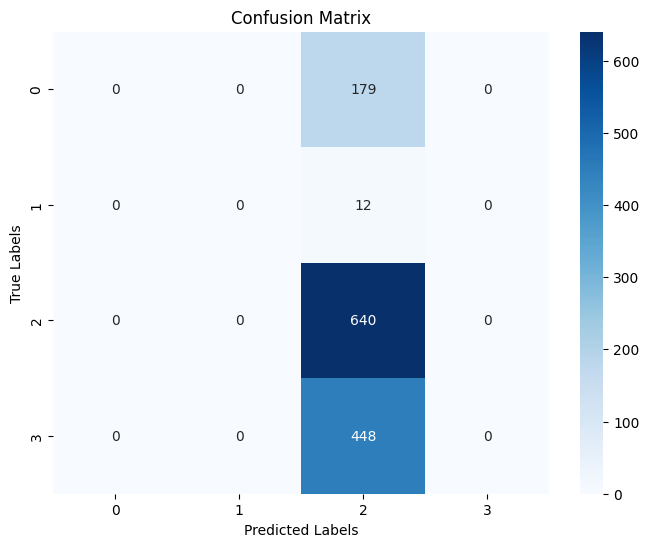

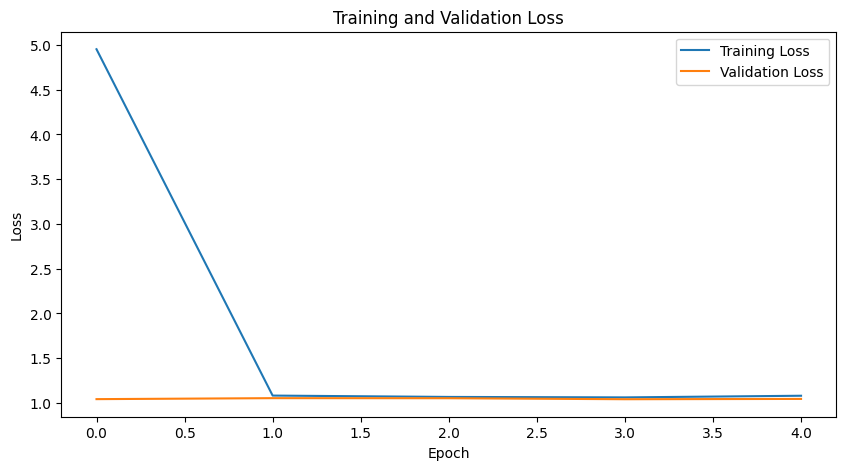

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       0.00      0.00      0.00       448

        accuracy                           0.50      1279
       macro avg       0.13      0.25      0.17      1279
    weighted avg       0.25      0.50      0.33      1279



C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for one epoch
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Print and plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print and plot training loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Print and plot classification report
class_names = list(train_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_names))


# VGG16 and EfficientNet

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

# Define VGG16 base model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the layers of the base model
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Add custom classification head
x = Flatten()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_vgg16 = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the VGG16 model
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=output_vgg16)

# Compile the VGG16 model
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define EfficientNet base model
base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the layers of the base model
for layer in base_model_efficientnet.layers:
    layer.trainable = False

# Add custom classification head
x = Flatten()(base_model_efficientnet.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_efficientnet = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the EfficientNet model
model_efficientnet = Model(inputs=base_model_efficientnet.input, outputs=output_efficientnet)

# Compile the EfficientNet model
model_efficientnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define learning rate scheduler for both models
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 3:
        lr *= 0.5
    return lr

lr_scheduler_vgg16 = LearningRateScheduler(lr_schedule)
lr_scheduler_efficientnet = LearningRateScheduler(lr_schedule)

# Train the VGG16 model for 5 epochs
history_vgg16 = model_vgg16.fit(train_generator,
                                epochs=5,
                                validation_data=validation_generator,
                                callbacks=[lr_scheduler_vgg16])

# Train the EfficientNet model for 5 epochs
history_efficientnet = model_efficientnet.fit(train_generator,
                                              epochs=5,
                                              validation_data=validation_generator,
                                              callbacks=[lr_scheduler_efficientnet])

# Evaluate the VGG16 model on the test set
test_loss_vgg16, test_accuracy_vgg16 = model_vgg16.evaluate(test_generator)

# Evaluate the EfficientNet model on the test set
test_loss_efficientnet, test_accuracy_efficientnet = model_efficientnet.evaluate(test_generator)



# Predict classes for the test set (VGG16)
predictions_vgg16 = model_vgg16.predict(test_generator)
predicted_classes_vgg16 = np.argmax(predictions_vgg16, axis=1)
true_classes_vgg16 = test_generator.classes
class_names_vgg16 = list(train_generator.class_indices.keys())

# Plot confusion matrix (VGG16)
plot_confusion_matrix(true_classes_vgg16, predicted_classes_vgg16, class_names_vgg16)

# Print and plot classification report (VGG16)
print_classification_report(true_classes_vgg16, predicted_classes_vgg16, class_names_vgg16)

# Plot validation loss and accuracy (VGG16)
plot_validation_loss_and_accuracy(history_vgg16)

# Print and plot test loss and accuracy (VGG16)
print_and_plot_test_loss_and_accuracy(test_loss_vgg16, test_accuracy_vgg16)



# Predict classes for the test set (EfficientNet)
predictions_efficientnet = model_efficientnet.predict(test_generator)
predicted_classes_efficientnet = np.argmax(predictions_efficientnet, axis=1)
true_classes_efficientnet = test_generator.classes
class_names_efficientnet = list(train_generator.class_indices.keys())

# Plot confusion matrix (EfficientNet)
plot_confusion_matrix(true_classes_efficientnet, predicted_classes_efficientnet, class_names_efficientnet)

# Print and plot classification report (EfficientNet)
print_classification_report(true_classes_efficientnet, predicted_classes_efficientnet, class_names_efficientnet)

# Plot validation loss and accuracy (EfficientNet)
plot_validation_loss_and_accuracy(history_efficientnet)

# Print and plot test loss and accuracy (EfficientNet)
print_and_plot_test_loss_and_accuracy(test_loss_efficientnet, test_accuracy_efficientnet)


Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
16705208/16705208 [==============================] - 3s 0us/step
Epoch 1/5
129/129 [==============================] - 809s 6s/step - loss: 1.5489 - accuracy: 0.4719 - val_loss: 1.0602 - val_accuracy: 0.4976 - lr: 0.0010
Epoch 2/5
129/129 [==============================] - 798s 6s/step - loss: 1.0182 - accuracy: 0.5022 - val_loss: 1.0231 - val_accuracy: 0.4878 - lr: 0.0010
Epoch 3/5
129/129 [==============================] - 797s 6s/step - loss: 1.0050 - accuracy: 0.5024 - val_loss: 1.0186 - val_accuracy: 0.5191 - lr: 0.0010
Epoch 4/5
129/129 [==============================] - 793s 6s/step - loss: 0.9792 - accuracy: 0.5173 - val_loss: 1.0241 - val_accuracy: 0.5220 - lr: 0.0010
Epoch 5/5
129/129 [==============================] - 789s 6s/step - loss: 0.9568 - accuracy: 0.5351 - val_loss: 1.0040 - val_accuracy: 0.5200 - lr: 5.0000e-04
Epoch 1/5
129/129 [===========

NameError: name 'print_learning_rate' is not defined

40/40 [==============================] - 207s 5s/step


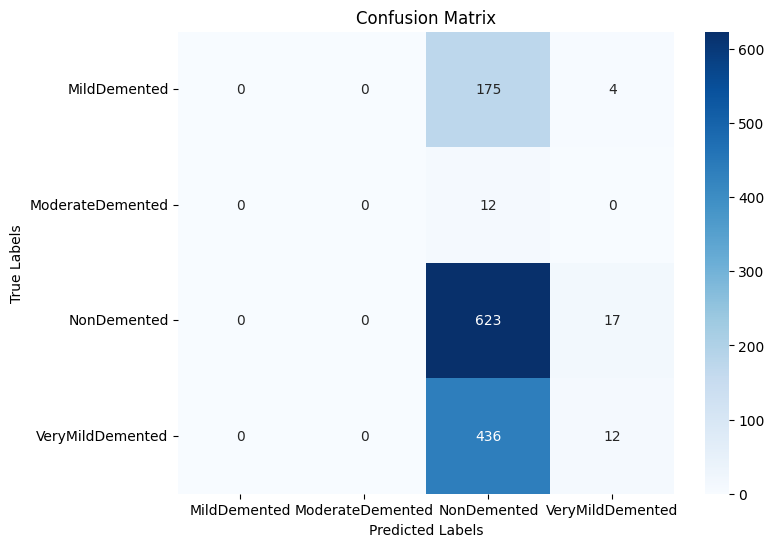

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      0.97      0.66       640
VeryMildDemented       0.36      0.03      0.05       448

        accuracy                           0.50      1279
       macro avg       0.22      0.25      0.18      1279
    weighted avg       0.38      0.50      0.35      1279



C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


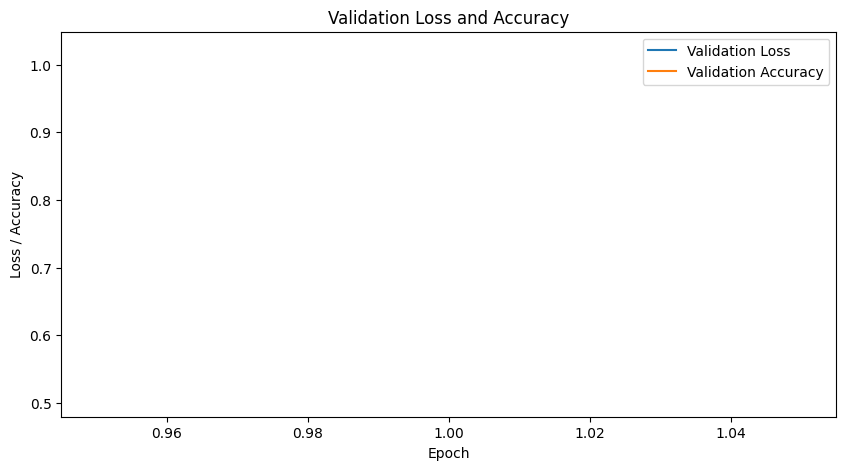

Test Loss: 0.9984192848205566
Test Accuracy: 0.5089914202690125
40/40 [==============================] - 44s 1s/step


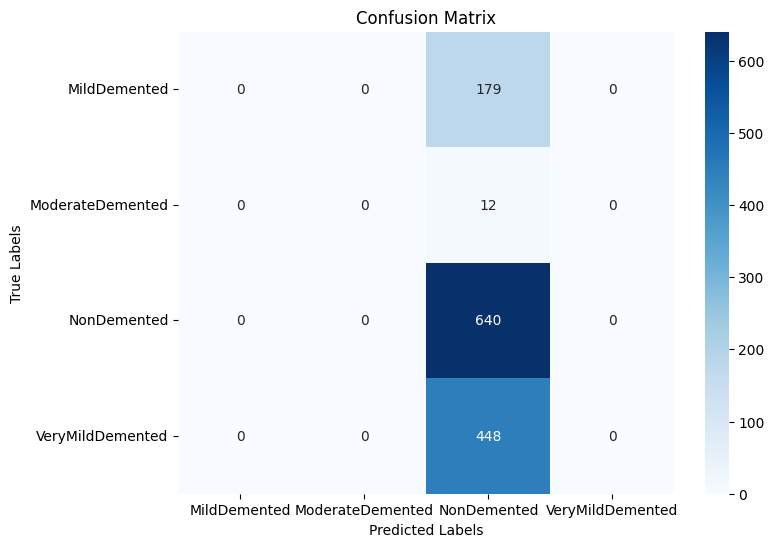

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       0.00      0.00      0.00       448

        accuracy                           0.50      1279
       macro avg       0.13      0.25      0.17      1279
    weighted avg       0.25      0.50      0.33      1279



C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


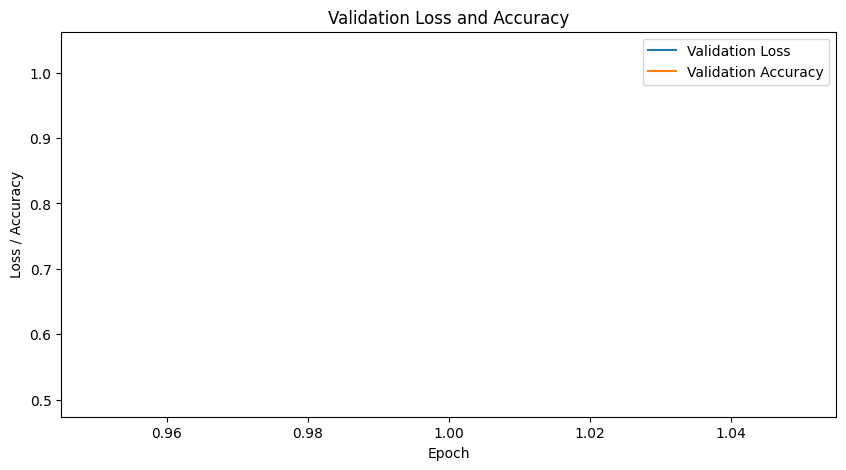

Test Loss: 1.0344209671020508
Test Accuracy: 0.5003909468650818


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler


# Define VGG16 base model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the layers of the base model
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Add custom classification head
x = Flatten()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_vgg16 = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the VGG16 model
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=output_vgg16)

# Compile the VGG16 model
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define EfficientNet base model
base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the layers of the base model
for layer in base_model_efficientnet.layers:
    layer.trainable = False

# Add custom classification head
x = Flatten()(base_model_efficientnet.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_efficientnet = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the EfficientNet model
model_efficientnet = Model(inputs=base_model_efficientnet.input, outputs=output_efficientnet)

# Compile the EfficientNet model
model_efficientnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


# Plot confusion matrix
def plot_confusion_matrix(true_classes, predicted_classes, class_names):
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Print classification report
def print_classification_report(true_classes, predicted_classes, class_names):
    print("Classification Report:")
    print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Plot validation loss and accuracy
def plot_validation_loss_and_accuracy(model_history):
    val_loss = model_history.history['val_loss']
    val_accuracy = model_history.history['val_accuracy']
    epochs = range(1, len(val_loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Validation Loss and Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Loss / Accuracy')
    plt.legend()
    plt.show()

# Print and plot test loss and accuracy
def print_and_plot_test_loss_and_accuracy(test_loss, test_accuracy):
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

# Train the VGG16 model for 5 epochs
history_vgg16 = model_vgg16.fit(train_generator,
                                epochs=1,
                                validation_data=validation_generator,
                                callbacks=[lr_scheduler_vgg16])

# Train the EfficientNet model for 1 epochs
history_efficientnet = model_efficientnet.fit(train_generator,
                                              epochs=1,
                                              validation_data=validation_generator,
                                              callbacks=[lr_scheduler_efficientnet])

# Evaluate the VGG16 model on the test set
test_loss_vgg16, test_accuracy_vgg16 = model_vgg16.evaluate(test_generator)

# Evaluate the EfficientNet model on the test set
test_loss_efficientnet, test_accuracy_efficientnet = model_efficientnet.evaluate(test_generator)


# Predict classes for the test set (VGG16)
predictions_vgg16 = model_vgg16.predict(test_generator)
predicted_classes_vgg16 = np.argmax(predictions_vgg16, axis=1)
true_classes_vgg16 = test_generator.classes
class_names_vgg16 = list(train_generator.class_indices.keys())

# Plot confusion matrix (VGG16)
plot_confusion_matrix(true_classes_vgg16, predicted_classes_vgg16, class_names_vgg16)

# Print and plot classification report (VGG16)
print_classification_report(true_classes_vgg16, predicted_classes_vgg16, class_names_vgg16)

# Plot validation loss and accuracy (VGG16)
plot_validation_loss_and_accuracy(history_vgg16)

# Print and plot test loss and accuracy (VGG16)
print_and_plot_test_loss_and_accuracy(test_loss_vgg16, test_accuracy_vgg16)



# Predict classes for the test set (EfficientNet)
predictions_efficientnet = model_efficientnet.predict(test_generator)
predicted_classes_efficientnet = np.argmax(predictions_efficientnet, axis=1)
true_classes_efficientnet = test_generator.classes
class_names_efficientnet = list(train_generator.class_indices.keys())

# Plot confusion matrix (EfficientNet)
plot_confusion_matrix(true_classes_efficientnet, predicted_classes_efficientnet, class_names_efficientnet)

# Print and plot classification report (EfficientNet)
print_classification_report(true_classes_efficientnet, predicted_classes_efficientnet, class_names_efficientnet)

# Plot validation loss and accuracy (EfficientNet)
plot_validation_loss_and_accuracy(history_efficientnet)

# Print and plot test loss and accuracy (EfficientNet)
print_and_plot_test_loss_and_accuracy(test_loss_efficientnet, test_accuracy_efficientnet)


# Updated  Code

# ResNet - 50

Epoch 1/20



129/129 [==============================] - 895s 7s/step - loss: 1.5211 - accuracy: 0.5071 - val_loss: 1.0898 - val_accuracy: 0.5005 - lr: 1.0000e-04
Epoch 2/20
129/129 [==============================] - 851s 7s/step - loss: 0.8726 - accuracy: 0.5610 - val_loss: 1.0468 - val_accuracy: 0.4976 - lr: 1.0000e-04
Epoch 3/20
129/129 [==============================] - 859s 7s/step - loss: 0.8169 - accuracy: 0.6079 - val_loss: 1.1409 - val_accuracy: 0.4751 - lr: 1.0000e-04
Epoch 4/20
129/129 [==============================] - 816s 6s/step - loss: 0.7613 - accuracy: 0.6489 - val_loss: 2.4188 - val_accuracy: 0.5005 - lr: 1.0000e-04
Epoch 5/20
129/129 [==============================] - 763s 6s/step - loss: 0.7044 - accuracy: 0.6774 - val_loss: 2.7592 - val_accuracy: 0.5103 - lr: 1.0000e-04
Epoch 6/20
129/129 [==============================] - 853s 7s/step - loss: 0.6484 - accuracy: 0.7204 - val_loss: 3.2073 - val_accuracy: 0.5122 - lr: 1.0000e-04
Epoch 7/20
40/40 [==============================] -

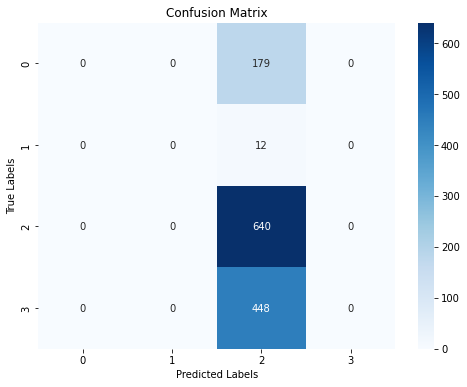

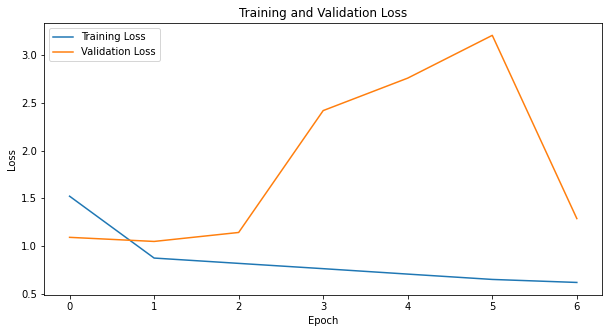

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       0.00      0.00      0.00       448

        accuracy                           0.50      1279
       macro avg       0.13      0.25      0.17      1279
    weighted avg       0.25      0.50      0.33      1279



C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Unfreeze the last few layers of the base ResNet50 model for fine-tuning
for layer in base_model.layers[-15:]:
    layer.trainable = True

# Add custom classification head
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Define a learning rate scheduler
def lr_scheduler(epoch):
    lr = 1e-4
    if epoch > 10:
        lr *= 0.1
    return lr

scheduler = LearningRateScheduler(lr_scheduler)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model for 20 epochs with learning rate scheduler and early stopping
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[scheduler, early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Print and plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print and plot training loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Print and plot classification report
class_names = list(train_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_names))


# 3DCNN

40/40 [==============================] - 10s 241ms/step - loss: 1.0170 - accuracy: 0.5004
Test Loss: 1.0169936418533325
Test Accuracy: 0.5003909468650818
40/40 [==============================] - 8s 191ms/step


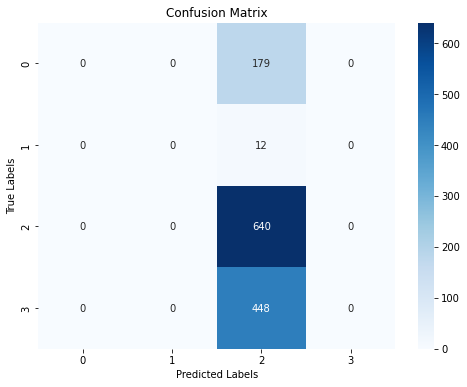

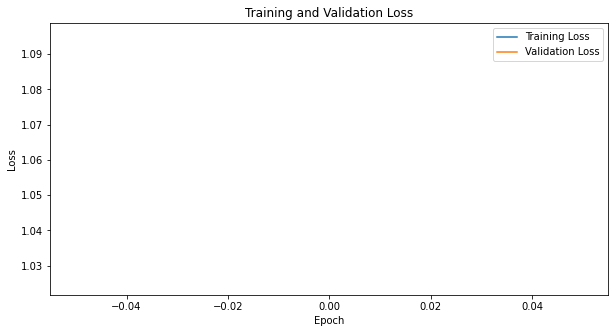

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       0.00      0.00      0.00       448

        accuracy                           0.50      1279
       macro avg       0.13      0.25      0.17      1279
    weighted avg       0.25      0.50      0.33      1279



C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers with dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(train_generator,
                    epochs=1,
                    validation_data=validation_generator,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Print and plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print and plot training loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Print and plot classification report
class_names = list(train_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_names))



# UPdated Code After the Feedback

# Resnet 50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine base model with custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

40/40 [==============================] - 71s 2s/step - loss: 2.0356 - accuracy: 0.1360
Test Loss: 2.0355796813964844
Test Accuracy: 0.13604378700256348
40/40 [==============================] - 64s 2s/step


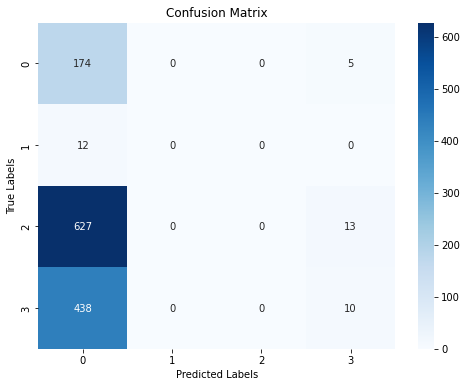

                  precision    recall  f1-score   support

    MildDemented       0.14      0.97      0.24       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.00      0.00      0.00       640
VeryMildDemented       0.36      0.02      0.04       448

        accuracy                           0.14      1279
       macro avg       0.12      0.25      0.07      1279
    weighted avg       0.14      0.14      0.05      1279



C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Print and plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print and plot classification report
class_names = list(train_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_names))


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

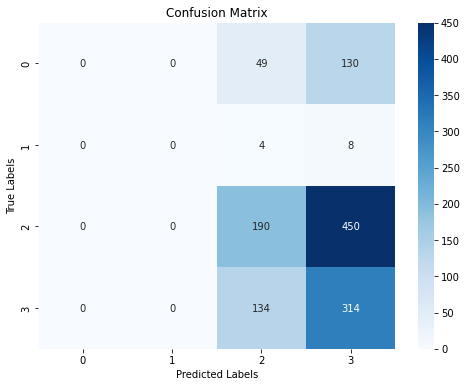

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      0.30      0.37       640
VeryMildDemented       0.35      0.70      0.47       448

        accuracy                           0.39      1279
       macro avg       0.21      0.25      0.21      1279
    weighted avg       0.37      0.39      0.35      1279



C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine base model with custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model for at least 2 epochs
history = model.fit(train_generator,
                    epochs=2,
                    validation_data=validation_generator)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Print and plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print and plot classification report
class_names = list(train_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_names))


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

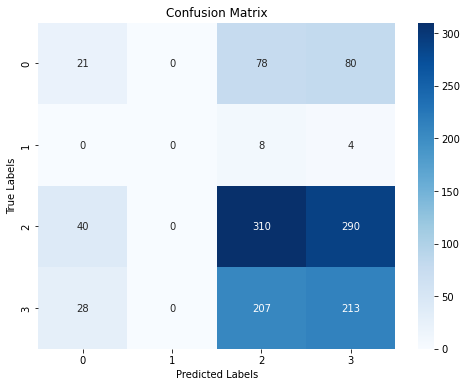

                  precision    recall  f1-score   support

    MildDemented       0.24      0.12      0.16       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.51      0.48      0.50       640
VeryMildDemented       0.36      0.48      0.41       448

        accuracy                           0.43      1279
       macro avg       0.28      0.27      0.27      1279
    weighted avg       0.42      0.43      0.42      1279



C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine base model with custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model for at least 5 epochs
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Print and plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print and plot classification report
class_names = list(train_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_names))


# VGG16

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

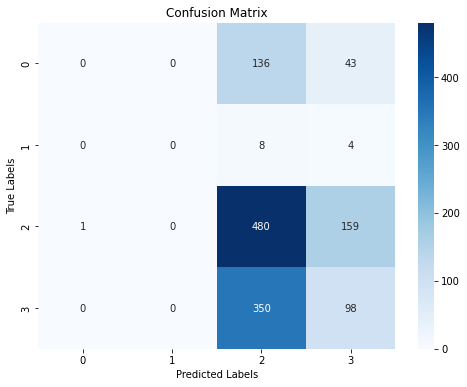

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.49      0.75      0.59       640
VeryMildDemented       0.32      0.22      0.26       448

        accuracy                           0.45      1279
       macro avg       0.20      0.24      0.21      1279
    weighted avg       0.36      0.45      0.39      1279



C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine base model with custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model for at least 5 epochs
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Print and plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print and plot classification report
class_names = list(train_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_names))


# EfficientNet

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]'] 

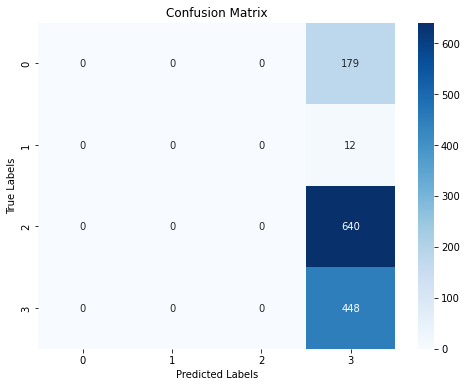

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.00      0.00      0.00       640
VeryMildDemented       0.35      1.00      0.52       448

        accuracy                           0.35      1279
       macro avg       0.09      0.25      0.13      1279
    weighted avg       0.12      0.35      0.18      1279



C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine base model with custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model for at least 5 epochs
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Print and plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print and plot classification report
class_names = list(train_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_names))


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_8[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

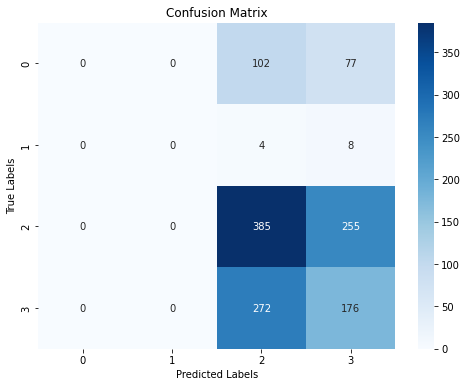

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      0.60      0.55       640
VeryMildDemented       0.34      0.39      0.37       448

        accuracy                           0.44      1279
       macro avg       0.21      0.25      0.23      1279
    weighted avg       0.37      0.44      0.40      1279



C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine base model with custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model for at least 20 epochs
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Print and plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print and plot classification report
class_names = list(train_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_names))
